# Lab 3 - Gry dwuosobowe

In [1]:
from wsilib.algorithms.minimax.minimax import MiniMaxPlayer, MiniMaxAlphaBetaPlayer
from wsilib.game.game import TicTacToe
from wsilib.game.player import RandomPlayer
from typing import Tuple, Literal
from src.plotting import print_tic_tac_toe
from src.experiments import experiment, run_experiments
import numpy as np


## Kółko i krzyżyk 3x3

### Heurystyka dla algorytmu minimax

In [2]:
def heuristic3x3(state: Tuple, turn: Literal[1, 0]) -> int:
    state = list(state)
    for i in range(len(state)):
        if state[i] is None:
            state[i] = 0
        elif state[i] == turn:
            state[i] = 1
        else:
            state[i] = -1
    matrix = np.array(state).reshape((3, 3))

    point_matrix = np.array(
        [
            [3, 2, 3],
            [2, 4, 2],
            [3, 2, 3],
        ]
    )
    return np.sum(point_matrix * matrix)

### Przykład gry MiniMax vs random


In [3]:
game = TicTacToe(size=3)

players = [
    RandomPlayer(game, 0),
    MiniMaxPlayer(game, 1, heuristic=heuristic3x3, depth=5)
]

p = 0
while True:
    print_tic_tac_toe(game.state)
    result = game.make_move(players[p].get_move())
    p = 1 - p
    if result[0]:
        print_tic_tac_toe(game.state)
        break

print("Game over. Winner:", "O" if result[1] else "X")


   |   |   
---+---+---
   |   |   
---+---+---
   |   |   


   |   |   
---+---+---
   |   | X 
---+---+---
   |   |   


   |   |   
---+---+---
 O |   | X 
---+---+---
   |   |   


   |   |   
---+---+---
 O |   | X 
---+---+---
 X |   |   


   |   |   
---+---+---
 O |   | X 
---+---+---
 X |   | O 


   | X |   
---+---+---
 O |   | X 
---+---+---
 X |   | O 


 O | X |   
---+---+---
 O |   | X 
---+---+---
 X |   | O 


 O | X |   
---+---+---
 O | X | X 
---+---+---
 X |   | O 


 O | X | O 
---+---+---
 O | X | X 
---+---+---
 X |   | O 


 O | X | O 
---+---+---
 O | X | X 
---+---+---
 X | X | O 


Game over. Winner: X


### Performance: MiniMax vs MiniMaxAlphaBeta

In [4]:
game = TicTacToe(size=3)

minimax = MiniMaxPlayer(game, 0, heuristic=heuristic3x3, depth=5)
minimax_ab = MiniMaxAlphaBetaPlayer(game, 0, heuristic=heuristic3x3, depth=5)


import timeit
minimax_time = timeit.timeit(lambda: minimax.get_move(), number=1)
minimax_ab_tme = timeit.timeit(lambda: minimax_ab.get_move(), number=1)

print("Minimax time:", minimax_time)
print("Minimax alpha-beta time:", minimax_ab_tme)
print(f"MiniMaxAlphaBeta was {minimax_time / minimax_ab_tme:.2f} times faster than MiniMax")



Minimax time: 0.2032902919963817
Minimax alpha-beta time: 0.02369945799728157
MiniMaxAlphaBeta was 8.58 times faster than MiniMax


### Eksperyment 1: MiniMaxAlphaBeta vs Random

RandomPlayer vs MiniMaxAlphaBetaPlayer @ depth [1, 3, 5, 9]


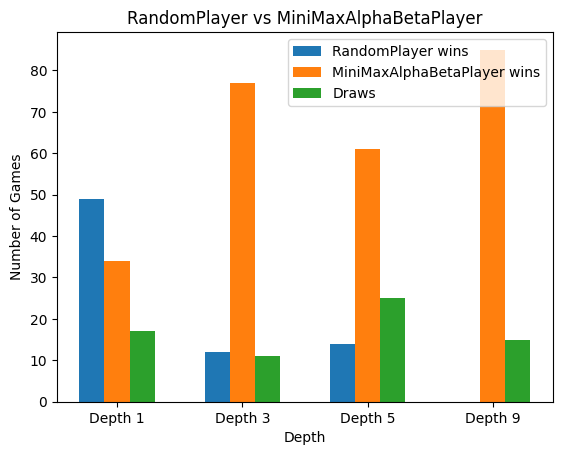

MiniMaxAlphaBetaPlayer vs RandomPlayer @ depth [1, 3, 5, 9]


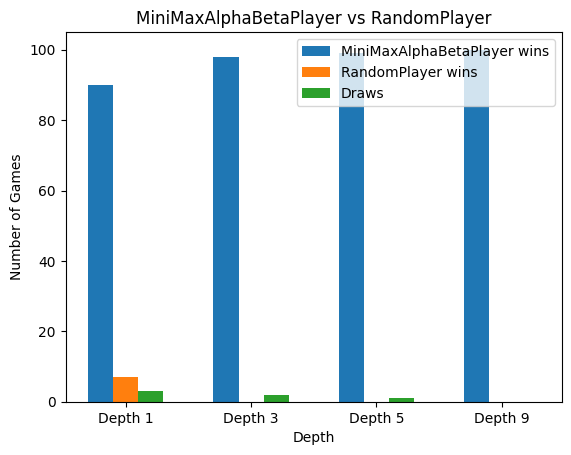

MiniMaxAlphaBetaPlayer vs MiniMaxAlphaBetaPlayer @ depth [1, 3, 5, 9]


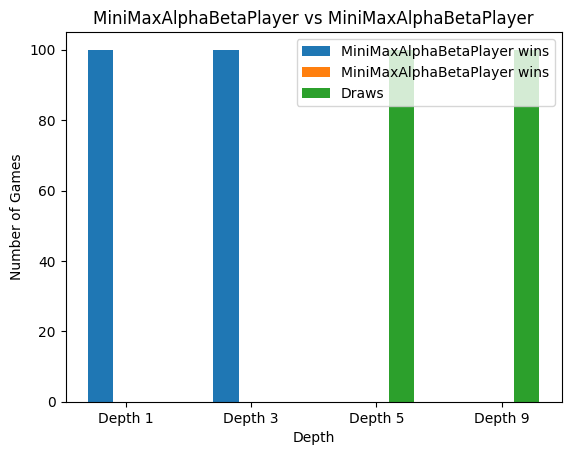

In [5]:
run_experiments(
    game=TicTacToe(size=3),
    rival_classes=[
        (RandomPlayer, MiniMaxAlphaBetaPlayer),
        (MiniMaxAlphaBetaPlayer, RandomPlayer),
        (MiniMaxAlphaBetaPlayer, MiniMaxAlphaBetaPlayer),
    ],
    depths=[1, 3, 5, 9],
    heuristic=heuristic3x3,
    num_games=100
)






## Kółko i Krzyżyk 5x5

In [ ]:
def heuristic5x5(state: Tuple, turn: Literal[1, 0]) -> int:
    return 0

In [ ]:
game = TicTacToe(size=5)

players = [
    RandomPlayer(game, 0),
    MiniMaxPlayer(game, 1, heuristic=heuristic5x5, depth=3)
]

p = 0
while True:
    print_tic_tac_toe(game.state)
    result = game.make_move(players[p].get_move())
    p = 1 - p
    if result[0]:
        print_tic_tac_toe(game.state)
        break

print("Game over. Winner:", "O" if result[1] else "X")